In [1]:
# Importing essential Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## **Reading and Understanding data**

In [54]:
# Read the given CSV file, and view sample records
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [23]:
#Summary of all the numeric columns in the dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [24]:
# Get to know about type of Data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [56]:
#Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* No missing values in the dataset

In [57]:
#Rename the columns for better understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
# Define the mapping for variables season, month, weathersit, weekday
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weathersit_mapping = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Snow + Fog'}
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

# Use the replace method
bike['season'] = bike['season'].replace(season_mapping)
bike['month'] = bike['month'].replace(month_mapping)
bike['weathersit'] = bike['weathersit'].replace(weathersit_mapping)
bike['weekday'] = bike['weekday'].replace(weekday_mapping)

bike.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## **Data Visualization**

In [60]:
# Calculate the number of unique values for each column
unique_values = bike.nunique().sort_values()

# Categorize columns based on the number of unique values
categorical_columns = unique_values[unique_values <= 40].index.tolist()
continuous_columns = unique_values[unique_values > 50].index.tolist()

# Output the categorized columns
print(f'Categorical columns: {categorical_columns}')
print(f'Continuous columns: {continuous_columns}')

Categorical columns: ['Year', 'holiday', 'workingday', 'weathersit', 'season', 'weekday', 'month']
Continuous columns: ['temp', 'humidity', 'casual', 'windspeed', 'registered', 'atemp', 'count', 'instant', 'dteday']


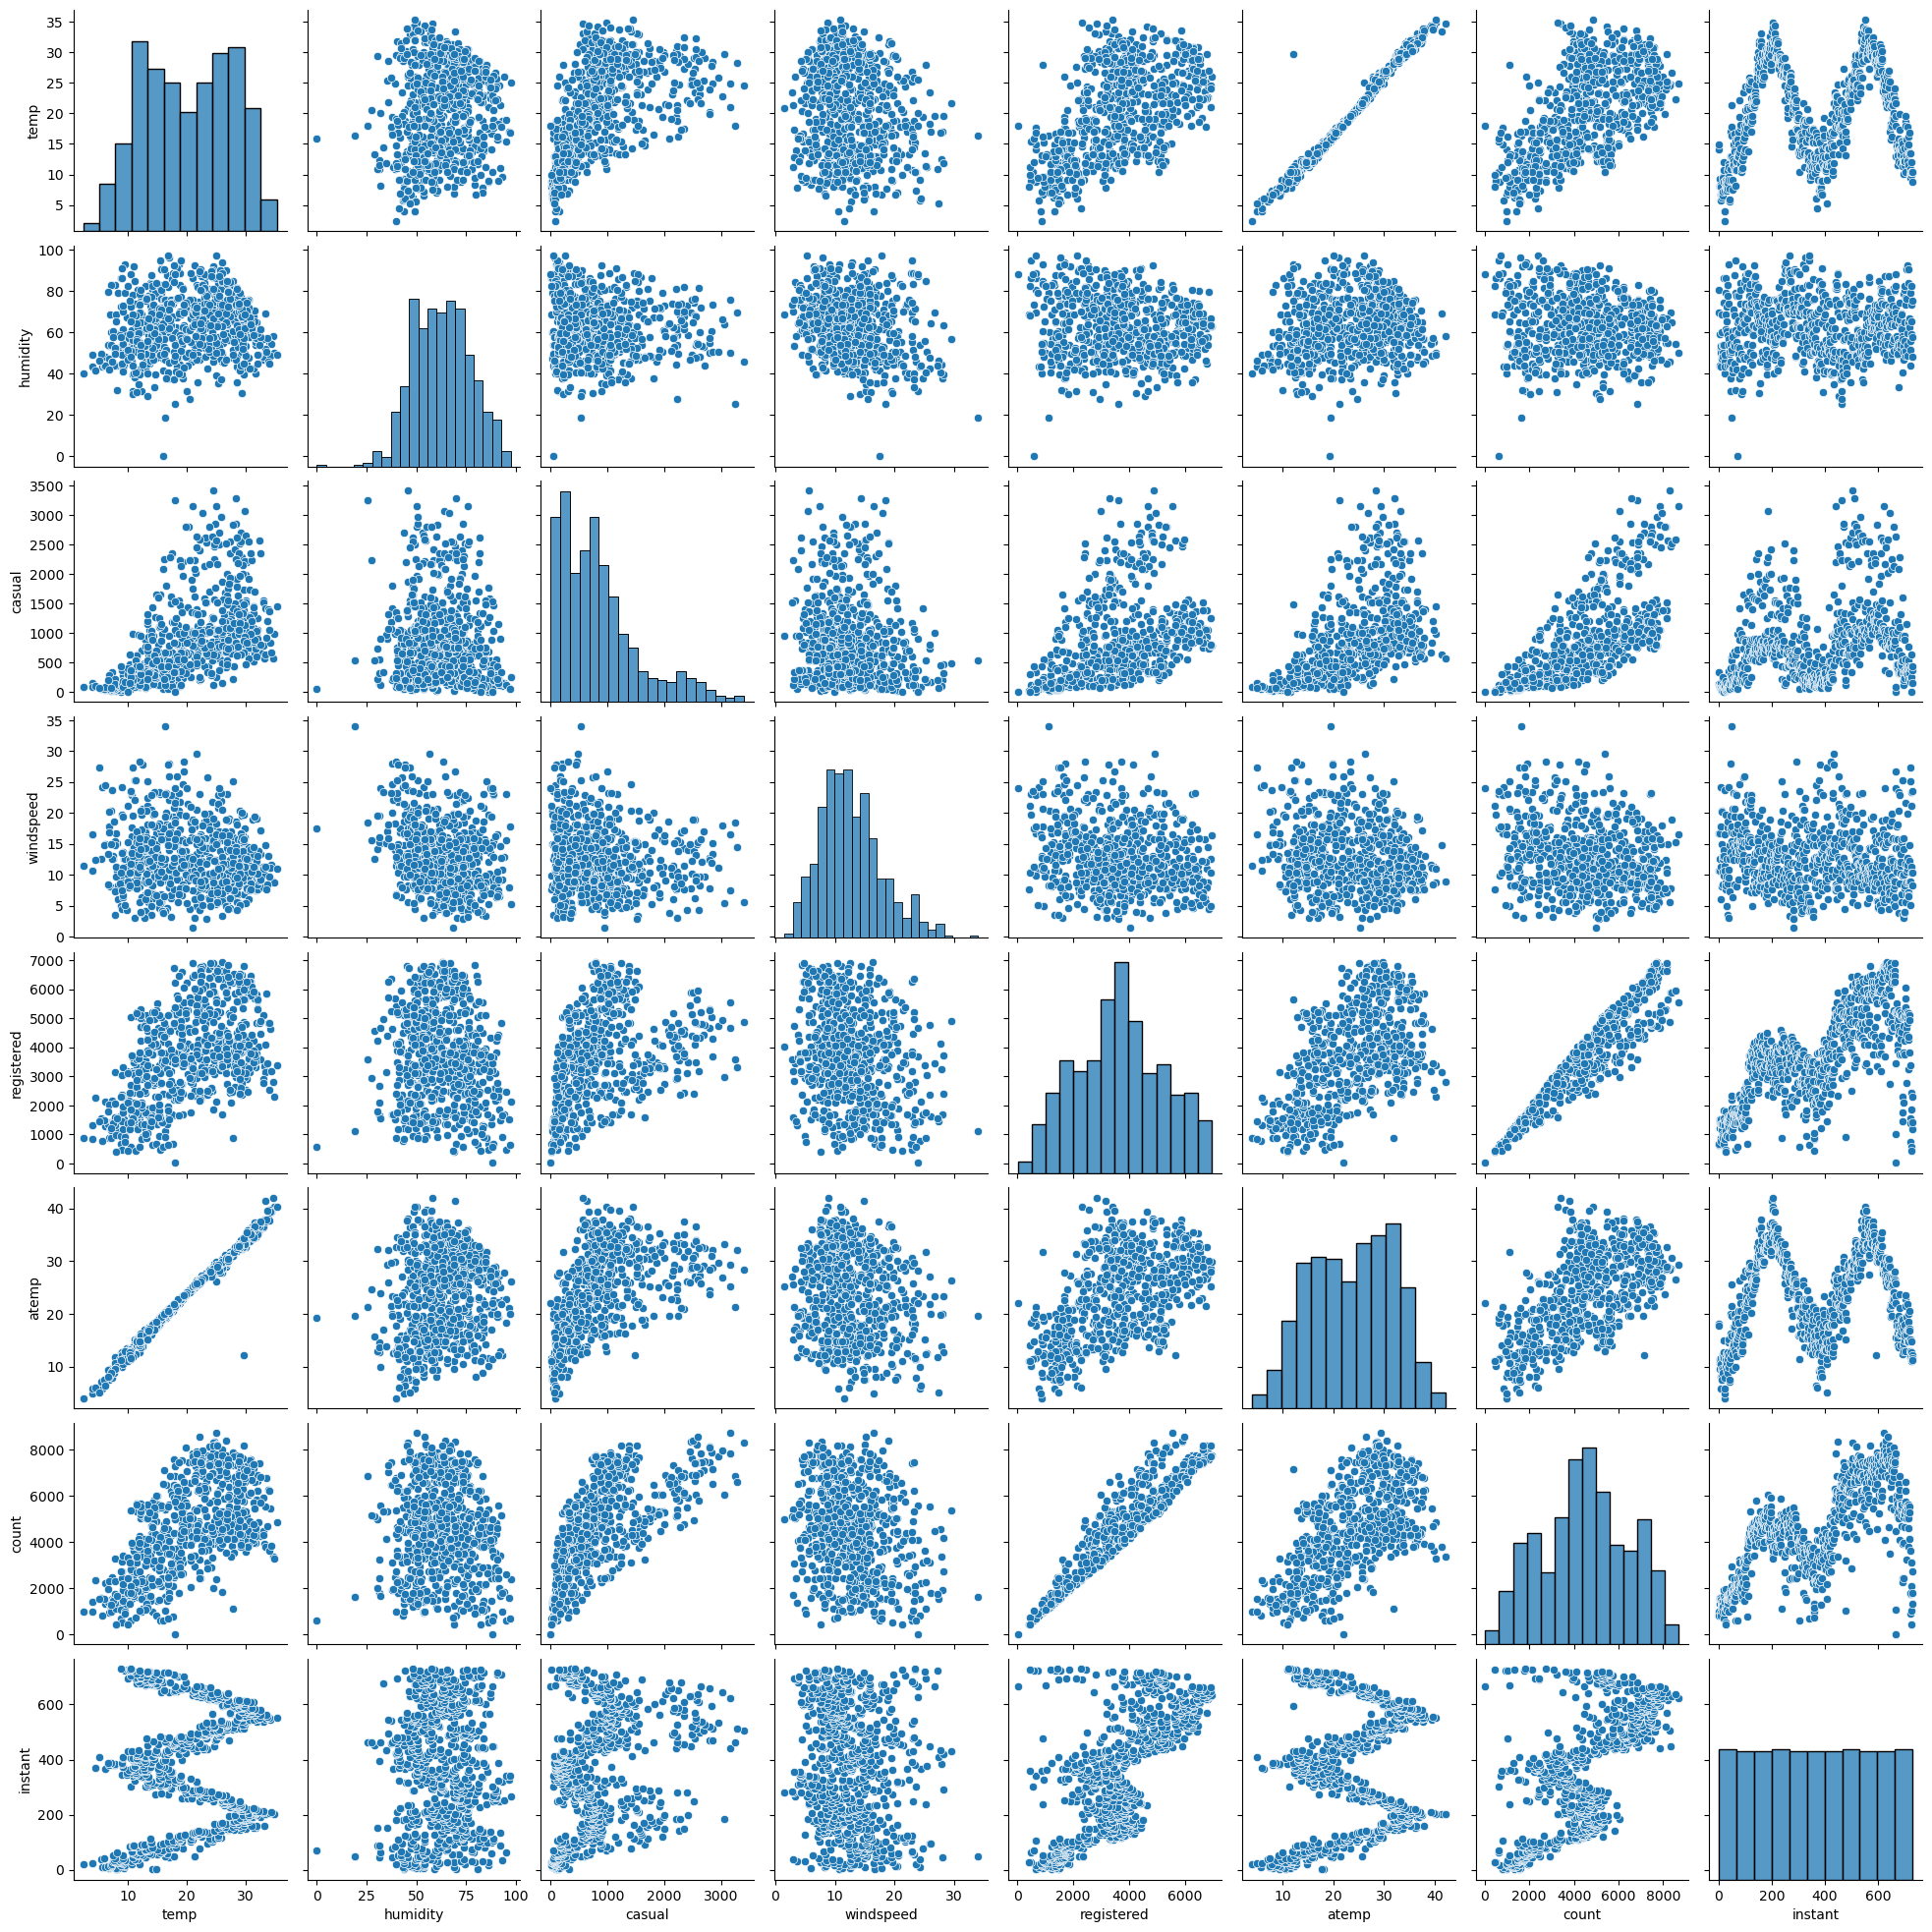

In [63]:
# Pairplot for the specified numeric variables
sns.pairplot(bike, vars=["temp", "humidity", "casual", "windspeed", "registered", "atemp", "count", "instant"])

# Display the plot
plt.show()

By analysing all the plots above, we can see that there are some independent variables which look positively correlated to the 'count' variable.
- Bike rentals are more correlated to temperature

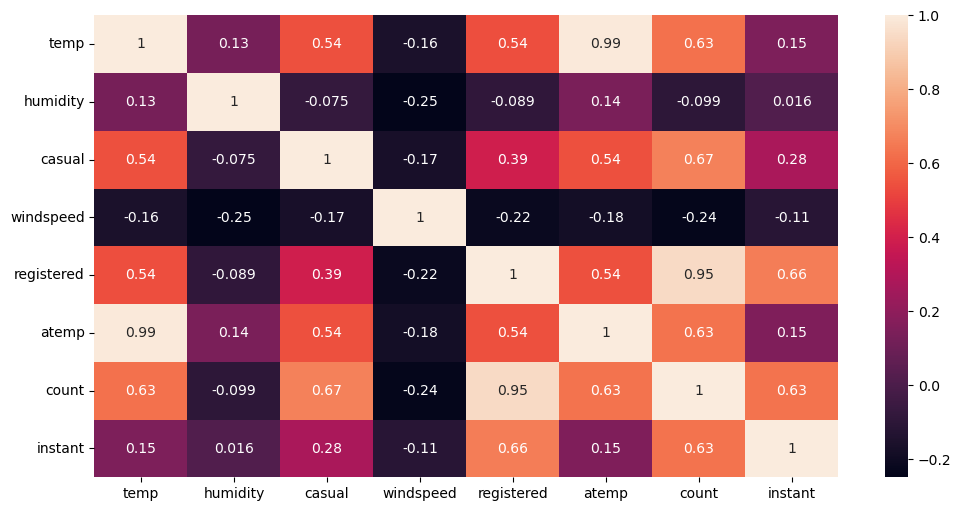

In [70]:
plt.figure(figsize = (12,6))
sns.heatmap(bike[["temp", "humidity", "casual", "windspeed", "registered", "atemp", "count", "instant"]].corr(),annot =True)
plt.show()

- windspeed has a negative correlation with casual and registered , which may suggest that higher windspeeds discourage bike rentals.
- humidity is negatively correlated with count , suggesting that higher humidity levels might slightly decrease the bike rentals.

# Visualising Categorical Variables

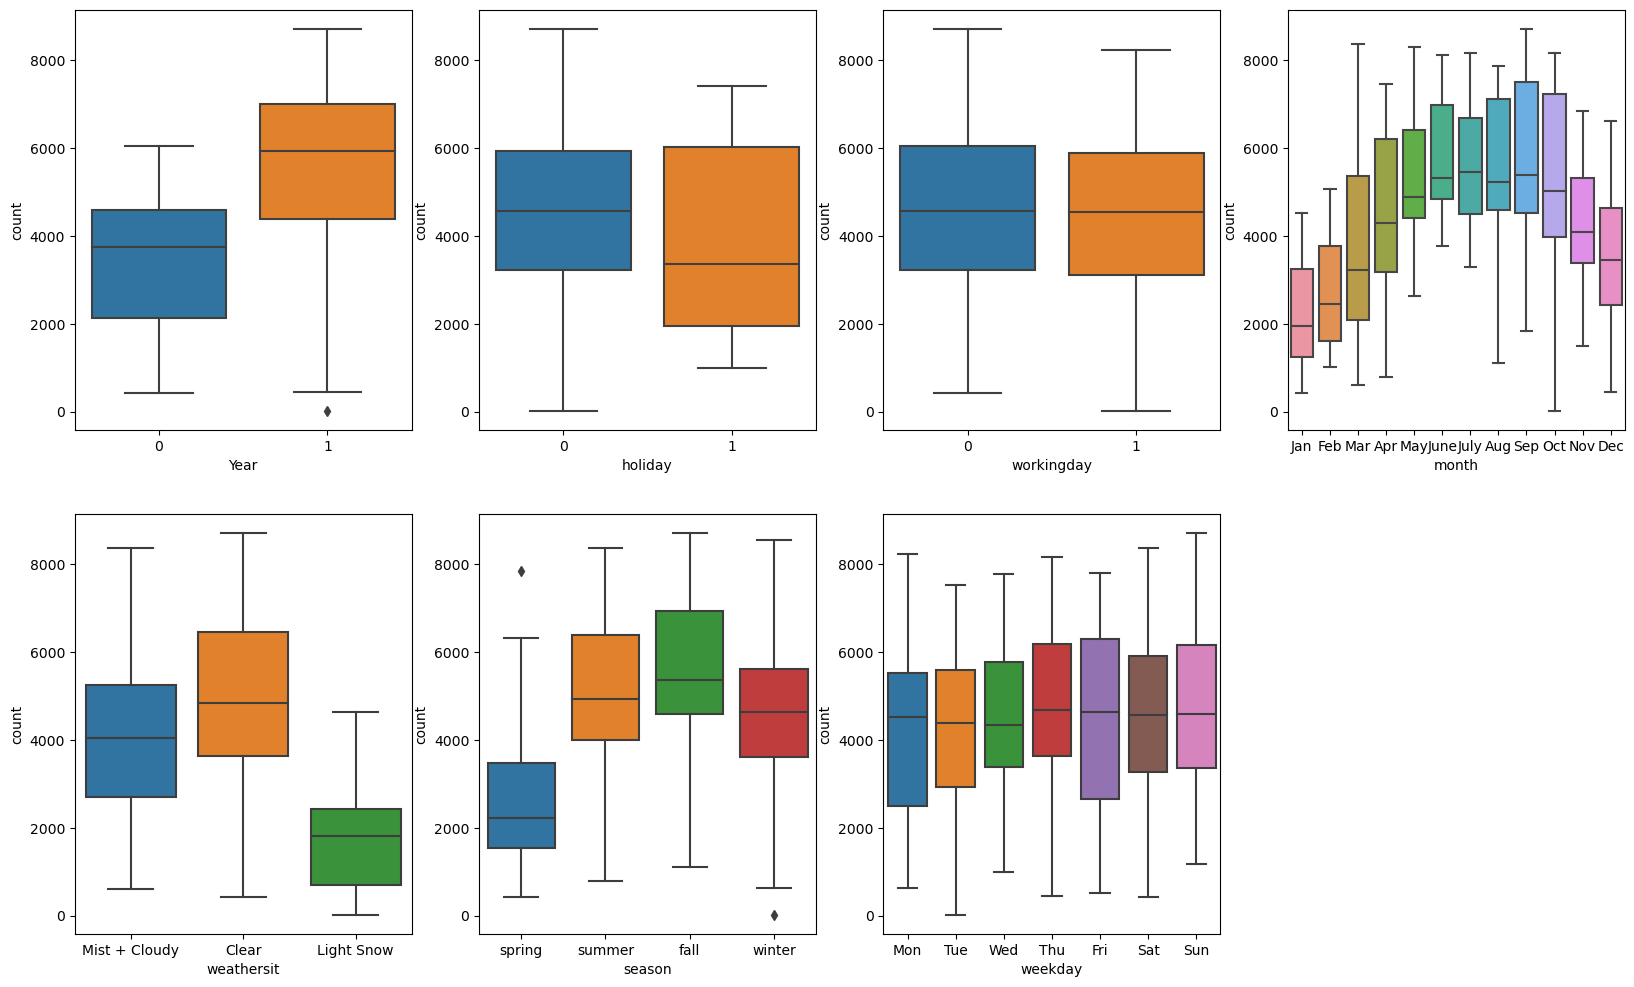

In [71]:
plt.figure(figsize=(20, 12))

# First subplot: Year vs. count
plt.subplot(2, 4, 1)
sns.boxplot(x='Year', y='count', data=bike)

# Second subplot: holiday vs. count
plt.subplot(2, 4, 2)
sns.boxplot(x='holiday', y='count', data=bike)

# Third subplot: workingday vs. count
plt.subplot(2, 4, 3)
sns.boxplot(x='workingday', y='count', data=bike)

# Fourth subplot: month vs. count
plt.subplot(2, 4, 4)
sns.boxplot(x='month', y='count', data=bike)

# Fifth subplot: weathersit vs. count
plt.subplot(2, 4, 5)
sns.boxplot(x='weathersit', y='count', data=bike)

# Sixth subplot: season vs. count
plt.subplot(2, 4, 6)
sns.boxplot(x='season', y='count', data=bike)

# Seventh subplot: weekday vs. count
plt.subplot(2, 4, 7)
sns.boxplot(x='weekday', y='count', data=bike)

# Display the plots
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

- Bike Rentals are more during the Fall season and then in summer
- Bike Rentals are more in the year 2019 compared to 2018
- Bike Rentals are more in partly cloudy weather
- Bike Rentals are more on Saturday,wednesday and thursday

# Lets understand the variables better

1: Season

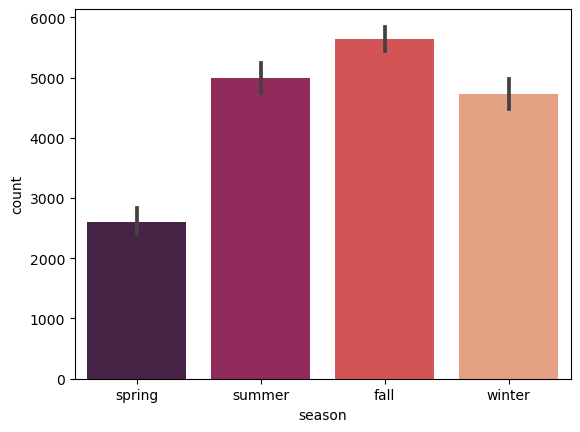

In [82]:
#Barplot to see relation between season and count of bike rentals
sns.barplot(x='season', y='count', data=bike, palette='rocket')
plt.show()

- Bike Rentals are more during the Fall season and then in summer

2: Weathersit

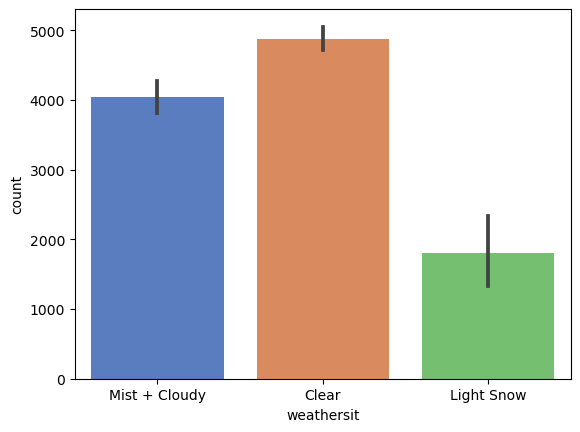

In [83]:
#Relation between weather and count of bike rentals
sns.barplot(x='weathersit', y='count', data=bike, palette='muted')
plt.show()

- Bike Rentals are more in partly cloudy weather

3: Year

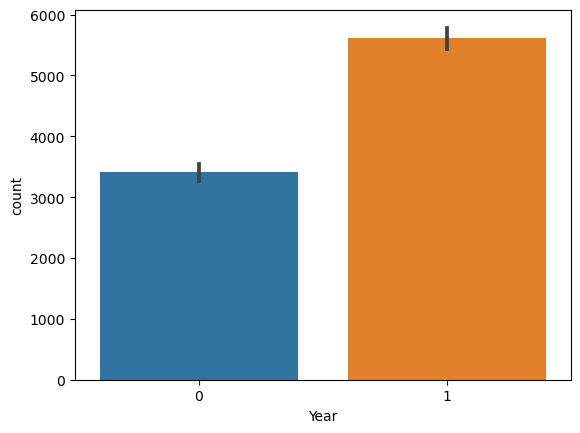

In [84]:
#Relation between Year and count of bike rentals
sns.barplot(x='Year',y='count',data=bike)
plt.show()

- Bike rentals are more in the year 2019 compared to 2018

4: Month

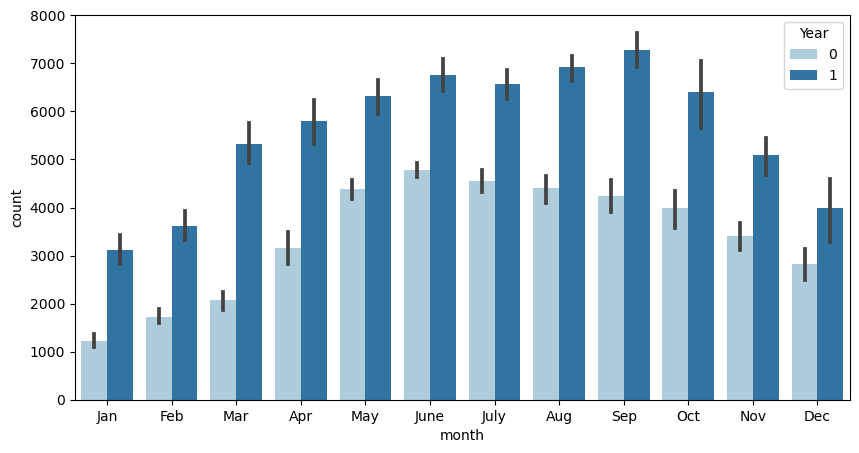

In [85]:
#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='count',hue='Year',data=bike,palette='Paired')
plt.show()

- Bike Rentals are more in the year 2019 compared to 2018

5: Temperature

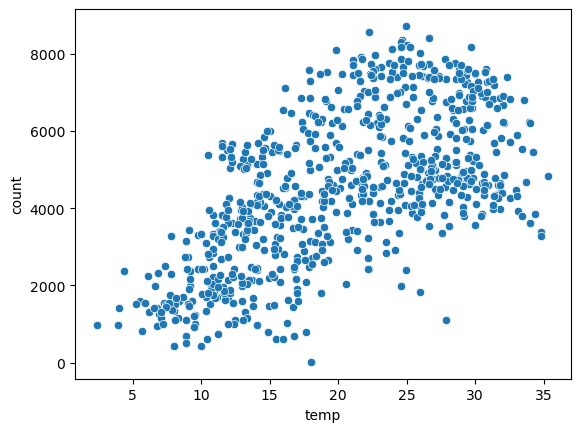

In [86]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=bike)
plt.show()

- Bike Rentals are observed at higher temperatures

6: Humidity

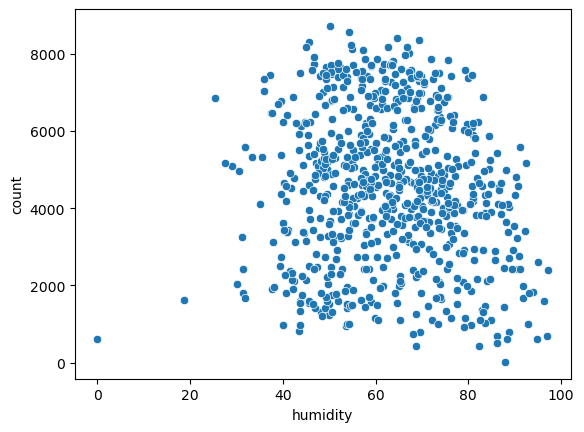

In [87]:
sns.scatterplot(x='humidity', y='count',data=bike)
plt.show()

- Bike rentals more at high humidity

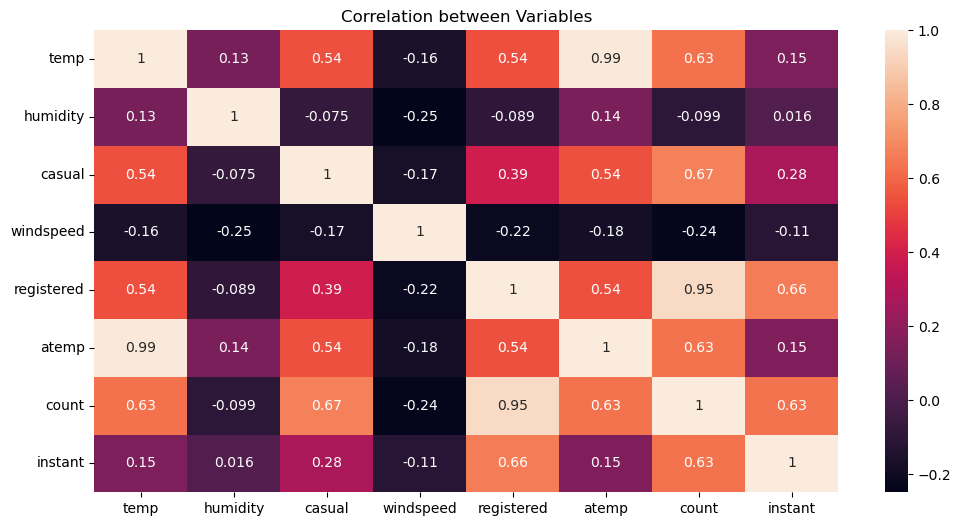

In [88]:
plt.figure(figsize = (12,6))
sns.heatmap(bike[["temp", "humidity", "casual", "windspeed", "registered", "atemp", "count", "instant"]].corr(),annot =True)
plt.title("Correlation between Variables")
plt.show()

- As visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable
- Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model
- So yes we can consider a Linear Regression Model.

# Drop the unnecessary variables from the dataset

We can drop instant, dteday, casual, registered ,atemp

In [100]:
#drop unnecessary columns
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

KeyError: "['instant', 'dteday', 'casual', 'registered', 'atemp'] not found in axis"

In [101]:
#Checking datatypes of all the columns
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

# Data Preparation

In [103]:
# # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)
# Add the results to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [104]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [105]:
#Number of rows and columns
bike.shape

(730, 29)

## **Data Modelling**

In [106]:
# Splitting the Data into Training and Testing Sets
bike_train,bike_test = train_test_split(bike,train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [107]:
# As we saw that Data was uniform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"humidity",'count']

# For the Training Data Fit and Transform both need to done.
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
bike_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Aug,510.0,0.096078,0.294988,0.0,0.000000,0.000000,0.000000,1.0
Dec,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0
Feb,510.0,0.066667,0.249689,0.0,0.000000,0.000000,0.000000,1.0
Jan,510.0,0.088235,0.283915,0.0,0.000000,0.000000,0.000000,1.0
July,510.0,0.076471,0.266010,0.0,0.000000,0.000000,0.000000,1.0
June,510.0,0.076471,0.266010,0.0,0.000000,0.000000,0.000000,1.0
Mar,510.0,0.098039,0.297660,0.0,0.000000,0.000000,0.000000,1.0
May,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0
Nov,510.0,0.086275,0.281045,0.0,0.000000,0.000000,0.000000,1.0
Oct,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0


> **We can see MinMax Scaling has been done properly for the Training Data as the Minimum
value is 0 for each of the Feature and Maximum value is 1 for each of the Feature**

In [108]:
#Dividing into X and Y sets for the model building
y_train = bike_train.pop('count')
X_train = bike_train
print(X_train.shape)
y_train.sample(5)

(510, 28)


136    0.471813
374    0.411413
588    0.750345
482    0.482973
85     0.192246
Name: count, dtype: float64

#### *Feature Selection using RFE(Recursive Feature Elimination)*

In [113]:
# Running RFE with the Output Number of variables equals to 15
# Create a Linear regression model instance
lm = LinearRegression()

# Create an RFE model instance specifying the number of features to select with n_features_to_select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE model
rfe.fit(X_train, y_train)  # This must be executed successfully before the next lines

# Now you can list the features selected by RFE along with their support and ranking status
feature_support_ranking = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# print the result
for feature in feature_support_ranking:
    print(feature)

('Aug', False, 9)
('Dec', True, 1)
('Feb', False, 2)
('Jan', True, 1)
('July', True, 1)
('June', False, 11)
('Mar', False, 14)
('May', False, 8)
('Nov', True, 1)
('Oct', False, 12)
('Sep', True, 1)
('Mon', False, 7)
('Sat', False, 4)
('Sun', False, 5)
('Thu', False, 13)
('Tue', False, 6)
('Wed', False, 10)
('Light Snow', True, 1)
('Mist + Cloudy', True, 1)
('spring', True, 1)
('summer', True, 1)
('winter', True, 1)
('Year', True, 1)
('holiday', True, 1)
('workingday', False, 3)
('temp', True, 1)
('humidity', True, 1)
('windspeed', True, 1)


In [114]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [115]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

***Building Model using statsmodels for the detailed statistics***

In [116]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [46]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.70e-192
Time:                        10:57:40   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0701      0.025      2.765      0.006       0.020       0.120
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Clear          0.1246      0.009     14.641      0.000       0.108       0.141
Mist           0.0679      0.011      5.937      0.000       0.045       0.090
Light         -0.1224      0.022     -5.604      0.000      -0.165      -0.079
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     2.35e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> As the Statistics Report say there is strong multicollinearity problems so we need to check for VIF

In [119]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.85
1,Jan,1.75


January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [121]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [123]:
#Build a model without Jan
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          9.86e-189
Time:                        21:08:45   Log-Likelihood:                 511.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     495   BIC:                            -929.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3002      0.035      8.499

In [125]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

KeyError: "['const'] not found in axis"

In [127]:
# Calculate the VIFs for the new model without B0
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.30
11,temp,16.75
13,windspeed,4.72
8,winter,4.06
6,spring,4.04
7,summer,2.81
5,Mist + Cloudy,2.31
9,Year,2.08
2,Nov,1.83
1,July,1.59


'humidity' variable can be dropped as its insignificant by looking at very high VIF

In [129]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [131]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.29e-185
Time:                        21:12:26   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2183      0.031      7.082

In [132]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [133]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.12
12,windspeed,4.65
8,winter,2.91
7,summer,2.23
6,spring,2.13
9,Year,2.07
2,Nov,1.81
1,July,1.59
5,Mist + Cloudy,1.55
0,Dec,1.42


Holiday variable seems to be insignificant, by looking at p value and low VIF. We can drop it

In [135]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [136]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.0
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.39e-184
Time:                        21:14:18   Log-Likelihood:                 494.65
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     497   BIC:                            -908.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2186      0.031      7.010

In [137]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [138]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.12
11,windspeed,4.65
8,winter,2.91
7,summer,2.23
6,spring,2.12
9,Year,2.07
2,Nov,1.78
1,July,1.58
5,Mist + Cloudy,1.55
0,Dec,1.42


Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it

In [140]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [141]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.03e-178
Time:                        21:15:49   Log-Likelihood:                 477.50
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     498   BIC:                            -880.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1681      0.031      5.428

In [143]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [144]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.22
8,winter,2.77
9,Year,2.06
7,summer,1.94
2,Nov,1.76
1,July,1.58
5,Mist + Cloudy,1.55
6,spring,1.43
0,Dec,1.42
3,Sep,1.34


July column can be dropped due to its p value and low VIF

In [146]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [147]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.07e-177
Time:                        21:23:59   Log-Likelihood:                 473.92
No. Observations:                 510   AIC:                            -925.8
Df Residuals:                     499   BIC:                            -879.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1594      0.031      5.145

In [148]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [149]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,2.89
7,winter,2.61
8,Year,2.06
1,Nov,1.76
6,summer,1.63
4,Mist + Cloudy,1.55
0,Dec,1.42
5,spring,1.36
2,Sep,1.24
3,Light Snow,1.07


## **Residual Analysis**

In [150]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lm5.predict(X_train_lm5)
res = (y_train - y_train_pred)

### *Looking for the Assumption : Normality*

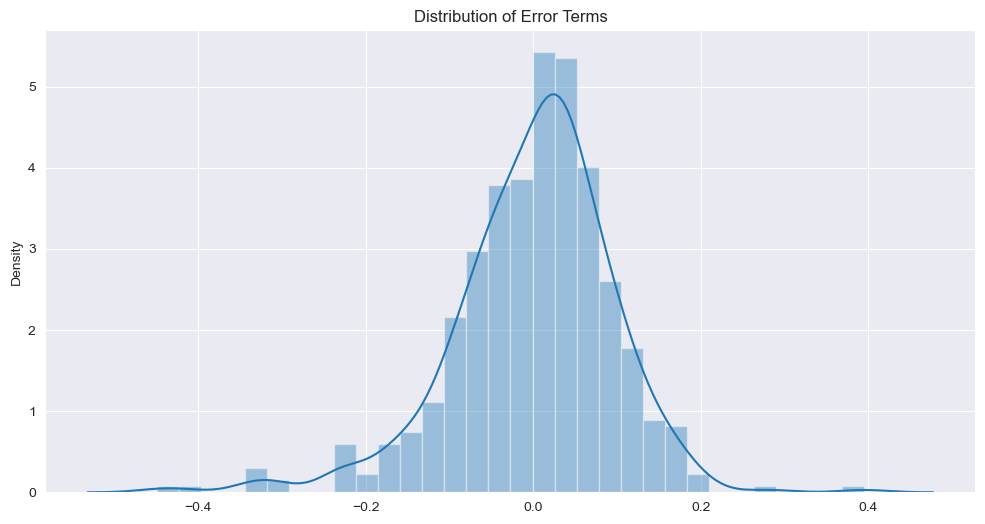

In [151]:
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

> **We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality**.

### Making Predictions

In [165]:
from sklearn.preprocessing import StandardScaler
num_vars = ['temp', 'humidity', 'windspeed']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(bike_train[num_vars])

# Now you can transform the test data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,7760.848092,135732.191483,14747.375118,4560.559091
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,2960.177547,32016.658750,6005.991429,1904.968544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1259.699773,54706.560470,1345.408563,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5180.210810,112257.388145,10440.038844,3312.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7753.912553,133012.629579,14251.842712,4582.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10264.991352,158464.850612,18112.940111,5913.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13164.944552,214092.232552,33346.057268,8395.000000


In [167]:
#Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

KeyError: 'count'

In [168]:
#Columns
X_train_new5.columns

Index(['Dec', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'temp'],
      dtype='object')

In [169]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from bike_test
X_test_new = bike_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Dec,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp
184,1.0,0,0,0,0,1,0,0,0,0,11227.255596
535,1.0,0,0,0,0,0,0,1,0,1,12110.414678
299,1.0,0,0,0,0,1,0,0,1,0,7167.330607
221,1.0,0,0,0,0,0,0,0,0,0,11859.970357
152,1.0,0,0,0,0,0,0,1,0,0,11042.708518


In [163]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

In [175]:
#Evaluate R-square for test
r2_score(y_test,y_pred)
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


The Final Model accuray is around 79.05%, Which is a Good Score.

# Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

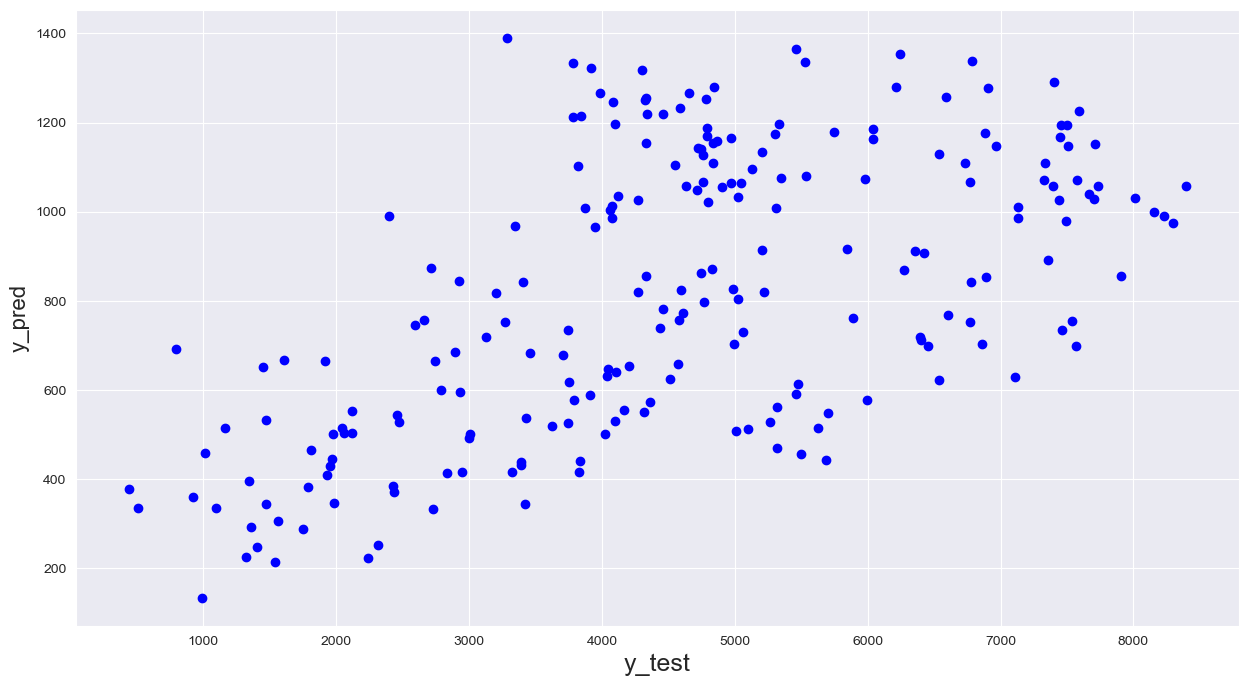

In [172]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

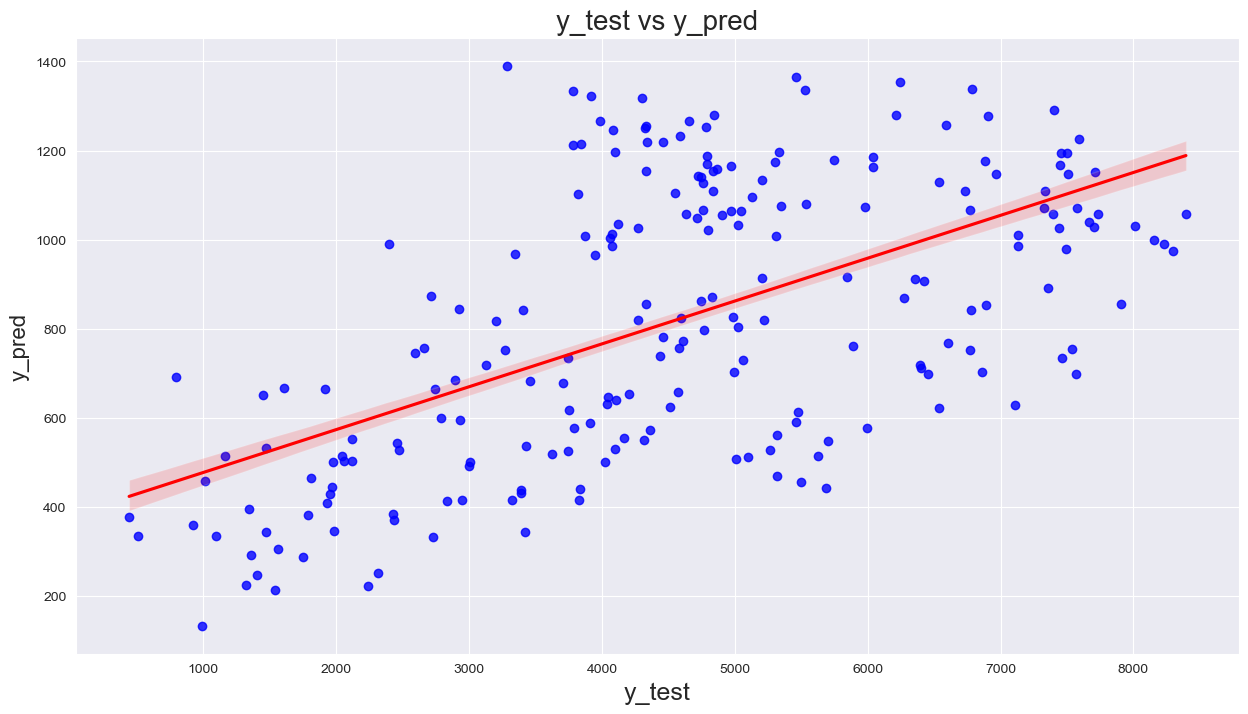

In [176]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [179]:
Cofficients = round(lm5.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp             0.47
Year             0.23
const            0.16
winter           0.11
Sep              0.09
summer           0.05
Dec             -0.03
Nov             -0.04
Mist + Cloudy   -0.08
spring          -0.08
Light Snow      -0.30
dtype: float64

In [180]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.47 * temp + 0.23 * Year + 0.16 * const + 0.11 * winter + 0.09 * Sep + 0.05 * summer + -0.03 * Dec + -0.04 * Nov + -0.08 * Mist + Cloudy + -0.08 * spring + -0.3 * Light Snow + 

Equation of Best Fit Line : 0.47 * temp + 0.23 * Year + 0.16 * const + 0.11 * winter + 0.09 * Sep + 0.05 * summer + -0.03 * Dec + -0.04 * Nov + -0.08 * Mist + Cloudy + -0.08 * spring + -0.3 * Light Snow 

# Insights

Temperature is the Most Significant Feature which affects the Business positively,

Whereas the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.

Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.

The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.

It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days

Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.

Even though without expending a single cent BOOM Bikes can expect their business to grow by 19%